In [299]:
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [300]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['NrSiblings'], inplace=True)
df.drop(columns=['LunchType'], inplace=True)
df.drop(columns=['IsFirstChild'], inplace=True)
df.drop(columns=['EthnicGroup'], inplace=True)
df.drop(columns=['TransportMeans'], inplace=True)



df


,Gender,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,bachelor's degree,none,married,regularly,< 5,71,71,74
1,female,some college,NaN,married,sometimes,5 - 10,69,90,88
2,female,master's degree,none,single,sometimes,< 5,87,93,91
3,male,associate's degree,none,married,never,5 - 10,45,56,42
4,male,some college,none,married,sometimes,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...
30636,female,high school,none,single,sometimes,5 - 10,59,61,65
30637,male,high school,none,single,regularly,5 - 10,58,53,51
30638,female,high school,completed,married,sometimes,5 - 10,61,70,67
30639,female,associate's degree,completed,married,regularly,5 - 10,82,90,93


In [301]:
df.isna().sum()


Gender                    0
ParentEduc             1845
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [302]:

df['TestPrep'].fillna(df['TestPrep'].mode()[0], inplace=True)
df['ParentEduc'].fillna(df['ParentEduc'].mode()[0], inplace=True)
df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0], inplace=True)
df['PracticeSport'].fillna(df['PracticeSport'].mode()[0], inplace=True)
df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0], inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

encoder = LabelEncoder()


df['ParentEduc'] = encoder.fit_transform(df['ParentEduc'])
df['TestPrep'] = encoder.fit_transform(df['TestPrep'])
df['ParentMaritalStatus'] = encoder.fit_transform(df['ParentMaritalStatus'])
df['PracticeSport'] = encoder.fit_transform(df['PracticeSport'])
df['WklyStudyHours'] = encoder.fit_transform(df['WklyStudyHours'])
df['Gender'] = encoder.fit_transform(df['Gender'])






C:\Users\asus\AppData\Local\Temp\ipykernel_20884\1643383585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TestPrep'].fillna(df['TestPrep'].mode()[0], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_20884\1643383585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [303]:

df.isna().sum()


Gender                 0
ParentEduc             0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [304]:
df['FinalScore']=((df['MathScore']+df['ReadingScore']+df['WritingScore'])/3)

df.drop(columns='MathScore',inplace=True)
df.drop(columns='ReadingScore',inplace=True)
df.drop(columns='WritingScore',inplace=True)

df

,Gender,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,WklyStudyHours,FinalScore
0,0,1,1,1,1,1,72.000000
1,0,4,1,1,2,0,82.333333
2,0,3,1,2,2,1,90.333333
3,1,0,1,1,0,0,47.666667
4,1,4,1,1,2,0,76.333333
...,...,...,...,...,...,...,...
30636,0,2,1,2,2,0,61.666667
30637,1,2,1,2,1,0,54.000000
30638,0,2,0,1,2,0,66.000000
30639,0,0,0,1,1,0,88.333333


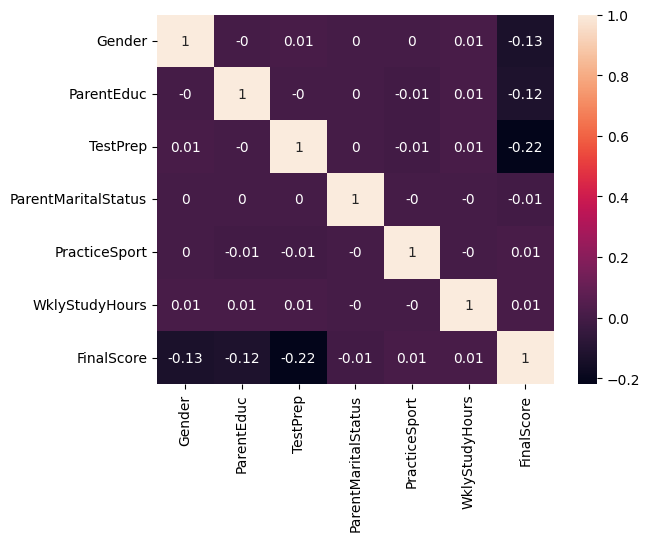

In [305]:
mat = df.corr().round(2)
sns.heatmap(data=mat,annot=True)
plt.show()

In [306]:
# df.drop(columns='ParentMaritalStatus',inplace=True)
# df.drop(columns='WklyStudyHours',inplace=True)
# df.drop(columns='PracticeSport',inplace=True)




# mat = df.corr().round(2)
# sns.heatmap(data=mat,annot=True)
# plt.show()

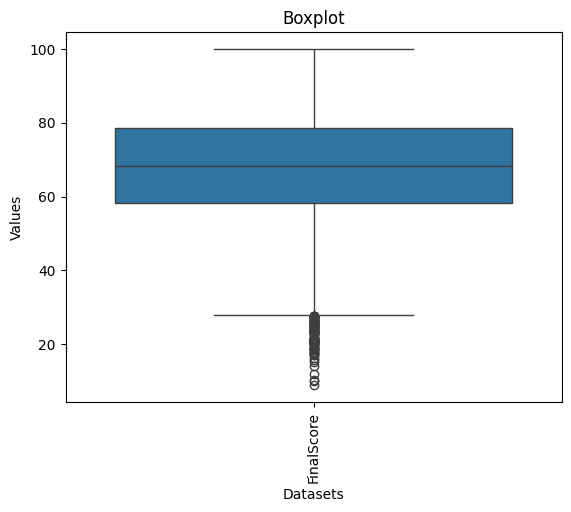

In [307]:
# #box plot pour voir si il y a des trop de outliers
# #pair plot pour voir si les données sont symetriques
data = [df['FinalScore']]

sns.boxplot(data)
plt.xticks(rotation=90) 
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()

outliers:


In [308]:

Q1 = df['FinalScore'].quantile(0.25)
Q3 = df['FinalScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FinalScore'] >= lower_bound) & (df['FinalScore'] <= upper_bound)]



In [309]:
df.drop_duplicates()

,Gender,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,WklyStudyHours,FinalScore
0,0,1,1,1,1,1,72.000000
1,0,4,1,1,2,0,82.333333
2,0,3,1,2,2,1,90.333333
3,1,0,1,1,0,0,47.666667
4,1,4,1,1,2,0,76.333333
...,...,...,...,...,...,...,...
30627,0,2,0,1,0,2,72.333333
30630,1,0,1,1,2,0,31.666667
30631,1,5,1,1,2,1,70.333333
30633,0,3,0,1,0,0,94.000000


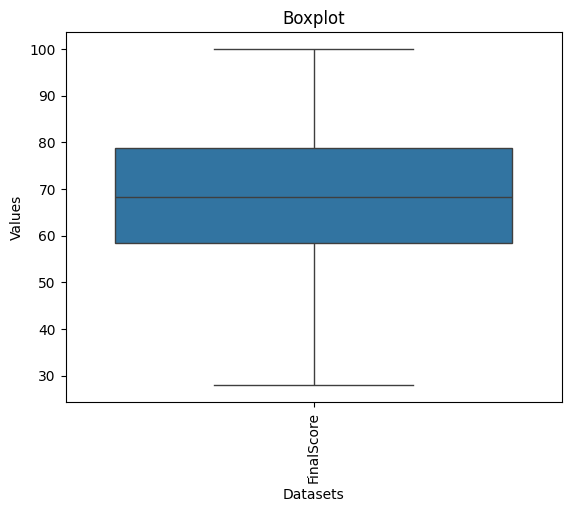

In [310]:
data = [df['FinalScore']]

sns.boxplot(data)
plt.xticks(rotation=90) 
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LinearRegression

x = df.drop(columns='FinalScore')
y = df['FinalScore']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=125)

In [312]:
df['FinalScore'] = pd.cut(df['FinalScore'], bins=5, labels=['E','D','C','B','A'])
df['FinalScore'].unique()

C:\Users\asus\AppData\Local\Temp\ipykernel_20884\1348887722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FinalScore'] = pd.cut(df['FinalScore'], bins=5, labels=['E','D','C','B','A'])


['B', 'A', 'D', 'E', 'C']
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [313]:
# sns.pairplot(df,hue='Gender')

Bonus : training and test


In [314]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

x = df.drop(columns='FinalScore')
y = df['FinalScore']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=125)

In [315]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_test,y_test)
y_pred = clf.predict(x_test)

In [316]:
print("real:      ",pd.DataFrame(y_test),"\n")
print("predicted: ",pd.DataFrame(y_pred))

real:             FinalScore
5293           A
8390           B
13550          C
26039          A
30178          B
...          ...
22698          C
24378          C
6732           B
4265           B
25941          A

[10078 rows x 1 columns] 

predicted:         0
0      B
1      C
2      C
3      A
4      B
...   ..
10073  C
10074  C
10075  C
10076  C
10077  D

[10078 rows x 1 columns]


In [317]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred,average='micro'))
print("Recall: ",recall_score(y_test,y_pred,average='micro'))
print("F1 Score: ",f1_score(y_test,y_pred,average='micro'))



Accuracy:  0.4333201031950784
Precision:  0.4333201031950784
Recall:  0.4333201031950784
F1 Score:  0.4333201031950784
